<a href="https://colab.research.google.com/github/mdaamir6870/Time-Series-Analysis-with-Statistical-Model/blob/main/Time__Series___Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Step 1: Load the data
import pandas as pd

# Try different encodings
encodings_to_try = ['utf-8', 'latin1', 'ISO-8859-1', 'cp1252']

file_path = 'Sample - Superstore.csv'

for encoding in encodings_to_try:
    try:
        superstore_data = pd.read_csv(file_path, encoding=encoding)
        print(f"Successfully read the file with encoding: {encoding}")
        break
    except UnicodeDecodeError:
        print(f"Failed to read with encoding: {encoding}")

# Continue with your data analysis...


Failed to read with encoding: utf-8
Successfully read the file with encoding: latin1


In [2]:
 superstore_data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,08-11-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,08-11-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,12-06-2016,16-06-2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,11-10-2015,18-10-2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,11-10-2015,18-10-2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


<ipython-input-3-d54e4671e9a9>:8: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  superstore_data['Order Date'] = pd.to_datetime(superstore_data['Order Date'])


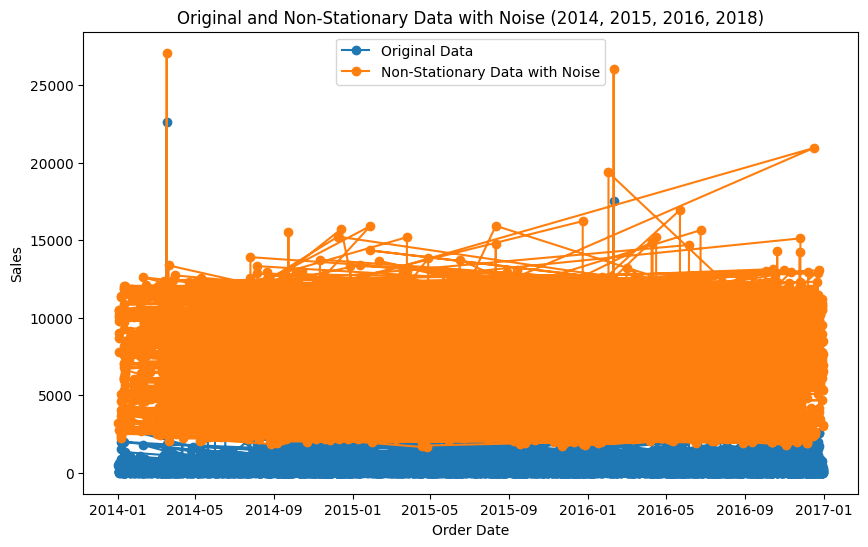

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming your original dataset is in a DataFrame called superstore_data

# Convert 'Order Date' to datetime
superstore_data['Order Date'] = pd.to_datetime(superstore_data['Order Date'])

# Extract the year from 'Order Date'
superstore_data['Year'] = superstore_data['Order Date'].dt.year

# Add a linear trend increasing according to the year
superstore_data['Trend'] = np.arange(len(superstore_data)) + superstore_data['Year']

# Add a sinusoidal seasonality
seasonality_freq = 0.1
superstore_data['Seasonality'] = np.sin(2 * np.pi * seasonality_freq * superstore_data['Order Date'].dt.month)

# Introduce varying noise based on the year
np.random.seed(42)  # for reproducibility
superstore_data['Noise'] = np.random.normal(0, 200, len(superstore_data))  # Adjust the scale as needed

# Combine components to create non-stationary data with noise
superstore_data['Non-Stationary'] = (
    superstore_data['Sales'] +
    superstore_data['Trend'] +
    superstore_data['Seasonality'] +
    superstore_data['Noise']
)

# Filter data for the years 2014, 2015, 2016, and 2018
filtered_data = superstore_data[superstore_data['Year'].isin([2014, 2015, 2016, 2018])]

# Plot the original and non-stationary data for the specified years with noise
plt.figure(figsize=(10, 6))
plt.plot(filtered_data['Order Date'], filtered_data['Sales'], label='Original Data', marker='o')
plt.plot(filtered_data['Order Date'], filtered_data['Non-Stationary'], label='Non-Stationary Data with Noise', marker='o')
plt.title('Original and Non-Stationary Data with Noise (2014, 2015, 2016, 2018)')
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.legend()
plt.show()


<ipython-input-4-fc18bc00644a>:8: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  superstore_data['Order Date'] = pd.to_datetime(superstore_data['Order Date'])


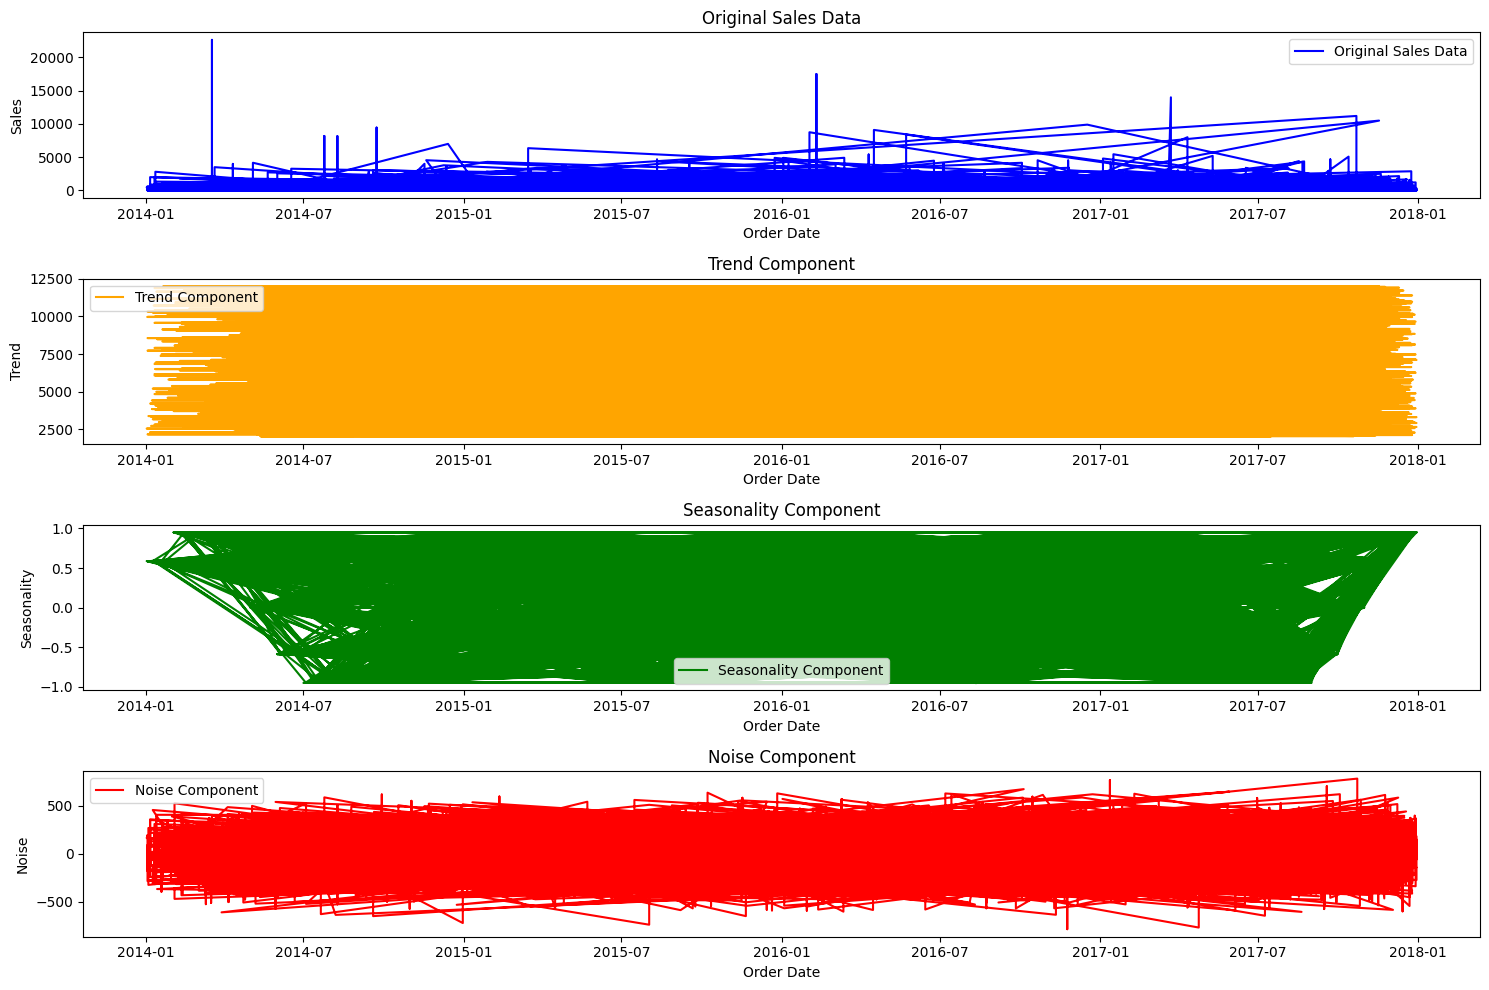

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming your original dataset is in a DataFrame called superstore_data

# Convert 'Order Date' to datetime
superstore_data['Order Date'] = pd.to_datetime(superstore_data['Order Date'])

# Extract the year from 'Order Date'
superstore_data['Year'] = superstore_data['Order Date'].dt.year

# Add a linear trend increasing according to the year
superstore_data['Trend'] = np.arange(len(superstore_data)) + superstore_data['Year']

# Add a sinusoidal seasonality
seasonality_freq = 0.1
superstore_data['Seasonality'] = np.sin(2 * np.pi * seasonality_freq * superstore_data['Order Date'].dt.month)

# Introduce varying noise based on the year
np.random.seed(42)  # for reproducibility
superstore_data['Noise'] = np.random.normal(0, 200, len(superstore_data))  # Adjust the scale as needed

# Combine components to create non-stationary data with noise
superstore_data['Non-Stationary'] = (
    superstore_data['Sales'] +
    superstore_data['Trend'] +
    superstore_data['Seasonality'] +
    superstore_data['Noise']
)

# Plot the time series components
plt.figure(figsize=(15, 10))

# Original Sales Data
plt.subplot(4, 1, 1)
plt.plot(superstore_data['Order Date'], superstore_data['Sales'], label='Original Sales Data', color='blue')
plt.title('Original Sales Data')
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.legend()

# Trend Component
plt.subplot(4, 1, 2)
plt.plot(superstore_data['Order Date'], superstore_data['Trend'], label='Trend Component', color='orange')
plt.title('Trend Component')
plt.xlabel('Order Date')
plt.ylabel('Trend')
plt.legend()

# Seasonality Component
plt.subplot(4, 1, 3)
plt.plot(superstore_data['Order Date'], superstore_data['Seasonality'], label='Seasonality Component', color='green')
plt.title('Seasonality Component')
plt.xlabel('Order Date')
plt.ylabel('Seasonality')
plt.legend()

# Noise Component
plt.subplot(4, 1, 4)
plt.plot(superstore_data['Order Date'], superstore_data['Noise'], label='Noise Component', color='red')
plt.title('Noise Component')
plt.xlabel('Order Date')
plt.ylabel('Noise')
plt.legend()

plt.tight_layout()
plt.show()


In [5]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Assuming your original dataset is in a DataFrame called superstore_data



# Extract the time series component you want to test (e.g., 'Non-Stationary' with noise)
time_series = superstore_data['Non-Stationary']

# Ensure that the time series is a pandas Series
time_series = pd.Series(time_series)

# Seasonal decomposition using STL with explicitly specified period
result = sm.tsa.seasonal_decompose(time_series, period=12)  # Assuming monthly data with yearly seasonality

# Check for seasonality based on the amplitude of the seasonal component
seasonal_amplitude = np.max(np.abs(result.seasonal))
if seasonal_amplitude > 0:
    print("The data has evidence of seasonality.")
else:
    print("The data does not show evidence of seasonality.")


The data has evidence of seasonality.


In [6]:
from statsmodels.tsa.stattools import adfuller

# Assuming your original dataset is in a DataFrame called superstore_data

# Extract the time series component you want to test (e.g., 'Non-Stationary' with noise)
time_series = superstore_data['Non-Stationary']

# ADF Test
result = adfuller(time_series)
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

# Interpret the results
if result[1] <= 0.05:
    print("Reject the null hypothesis. The data is likely stationary.")
else:
    print("Fail to reject the null hypothesis. The data is likely non-stationary.")


ADF Statistic: -0.6223341654083636
p-value: 0.8658551431059303
Critical Values: {'1%': -3.4310070554484553, '5%': -2.8618303792785476, '10%': -2.5669245637538687}
Fail to reject the null hypothesis. The data is likely non-stationary.


In [14]:

# Extract the time series component you want to test (e.g., 'Non-Stationary' with noise)
time_series = superstore_data['Non-Stationary']

# Ensure that the time series is a pandas Series
time_series = pd.Series(time_series)

# Regular differencing
time_series_diff = time_series.diff().dropna()

# Seasonal differencing (assuming a seasonality period of 12 for monthly data)
seasonal_difference = time_series_diff.diff(12).dropna()

# ADF test for regular differencing
result_regular_diff = adfuller(time_series_diff)
p_value_regular_diff = result_regular_diff[1]

# ADF test for seasonal differencing
result_seasonal_diff = adfuller(seasonal_difference)
p_value_seasonal_diff = result_seasonal_diff[1]

# Print results
print(f"P-value for regular differencing: {p_value_regular_diff}")
print(f"P-value for seasonal differencing: {p_value_seasonal_diff}")


P-value for regular differencing: 0.0
P-value for seasonal differencing: 0.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


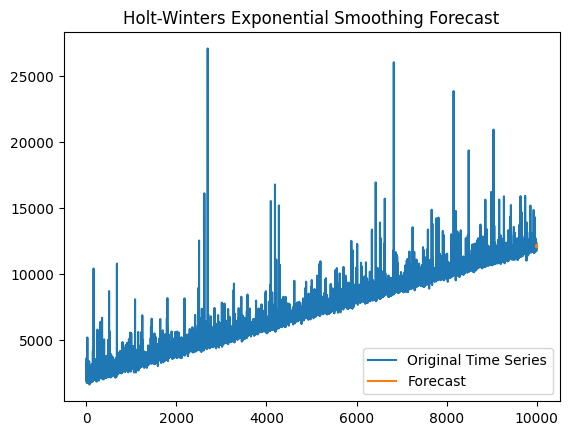

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Assuming your original dataset is in a DataFrame called superstore_data





# Extract the time series component you want to forecast (e.g., 'Non-Stationary' with noise)
time_series = superstore_data['Non-Stationary']

# Ensure that the time series is a pandas Series
time_series = pd.Series(time_series)

# Define the number of steps to forecast
forecast_steps = 12  # Adjust as needed

# Fit Holt-Winters Exponential Smoothing model with additive trend, additive seasonality
model = ExponentialSmoothing(time_series, trend='add', seasonal='add', seasonal_periods=12)
results = model.fit()

# Forecast future values
forecast = results.forecast(steps=forecast_steps)

# Plot the original time series and the forecast
plt.plot(time_series, label='Original Time Series')
plt.plot(forecast, label='Forecast')
plt.legend()
plt.title("Holt-Winters Exponential Smoothing Forecast")
plt.show()


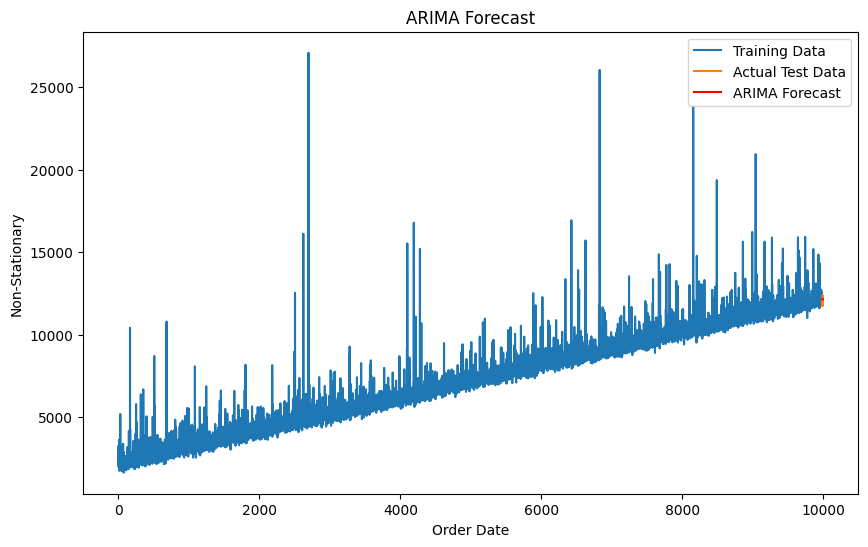

Mean Squared Error (ARIMA): 48567.3425675479


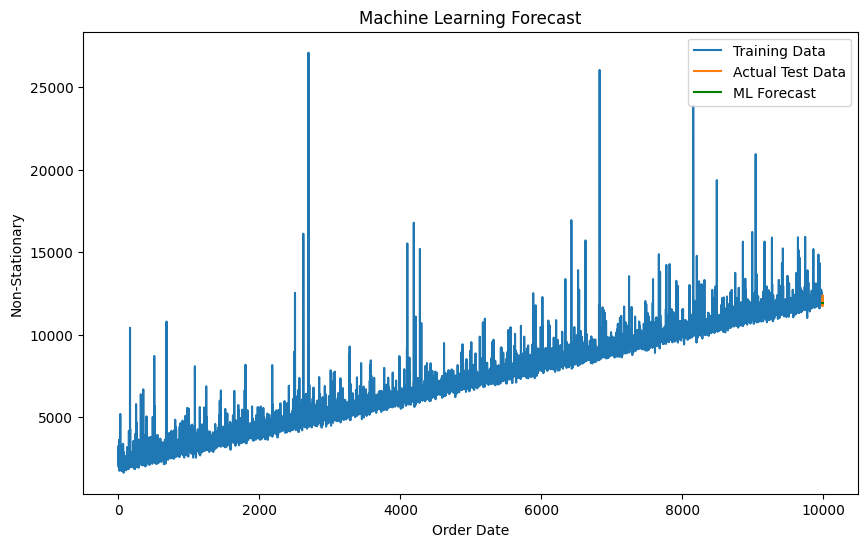

Mean Squared Error (ML): 46106.49042213915


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


# Extract the time series component you want to model (e.g., 'Non-Stationary' with noise)
time_series = superstore_data['Non-Stationary']

# Ensure that the time series is a pandas Series
time_series = pd.Series(time_series)

# Split the time series data into training and testing sets
# Here, let's use the last 12 months as the testing set
train_size = len(time_series) - 12
train, test = time_series[:train_size], time_series[train_size:]

# ARIMA modeling
# Fit ARIMA model
order = (1, 1, 1)  # Example order, you may need to tune these parameters
model_arima = ARIMA(train, order=order)
results_arima = model_arima.fit()

# Forecast future values
forecast_arima = results_arima.forecast(steps=len(test))

# Plot ARIMA forecast
plt.figure(figsize=(10, 6))
plt.plot(train, label='Training Data')
plt.plot(test, label='Actual Test Data')
plt.plot(test.index, forecast_arima, label='ARIMA Forecast', color='red')
plt.title('ARIMA Forecast')
plt.xlabel('Order Date')
plt.ylabel('Non-Stationary')
plt.legend()
plt.show()

# Evaluate ARIMA model
mse_arima = mean_squared_error(test, forecast_arima)
print(f'Mean Squared Error (ARIMA): {mse_arima}')

# Machine Learning Model (Random Forest Regressor)
# Prepare features and target variables
X_train, y_train = np.arange(len(train)).reshape(-1, 1), train.values
X_test, y_test = np.arange(len(train), len(train) + len(test)).reshape(-1, 1), test.values

# Initialize and fit the model
model_ml = RandomForestRegressor(n_estimators=100, random_state=42)
model_ml.fit(X_train, y_train)

# Predict future values
forecast_ml = model_ml.predict(X_test)

# Plot ML forecast
plt.figure(figsize=(10, 6))
plt.plot(train, label='Training Data')
plt.plot(test, label='Actual Test Data')
plt.plot(test.index, forecast_ml, label='ML Forecast', color='green')
plt.title('Machine Learning Forecast')
plt.xlabel('Order Date')
plt.ylabel('Non-Stationary')
plt.legend()
plt.show()

# Evaluate Machine Learning model
mse_ml = mean_squared_error(test, forecast_ml)
print(f'Mean Squared Error (ML): {mse_ml}')


In [10]:

# Extract the time series component you want to test (e.g., 'Non-Stationary' with noise)
time_series = superstore_data['Non-Stationary']

# Ensure that the time series is a pandas Series
time_series = pd.Series(time_series)

# Regular differencing
time_series_diff = time_series.diff().dropna()

# Seasonal differencing (assuming a seasonality period of 12 for monthly data)
seasonal_difference = time_series_diff.diff(12).dropna()

# ADF test for regular differencing
result_regular_diff = adfuller(time_series_diff)
p_value_regular_diff = result_regular_diff[1]

# ADF test for seasonal differencing
result_seasonal_diff = adfuller(seasonal_difference)
p_value_seasonal_diff = result_seasonal_diff[1]

# Print results
print(f"P-value for regular differencing: {p_value_regular_diff}")
print(f"P-value for seasonal differencing: {p_value_seasonal_diff}")


P-value for regular differencing: 0.0
P-value for seasonal differencing: 0.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

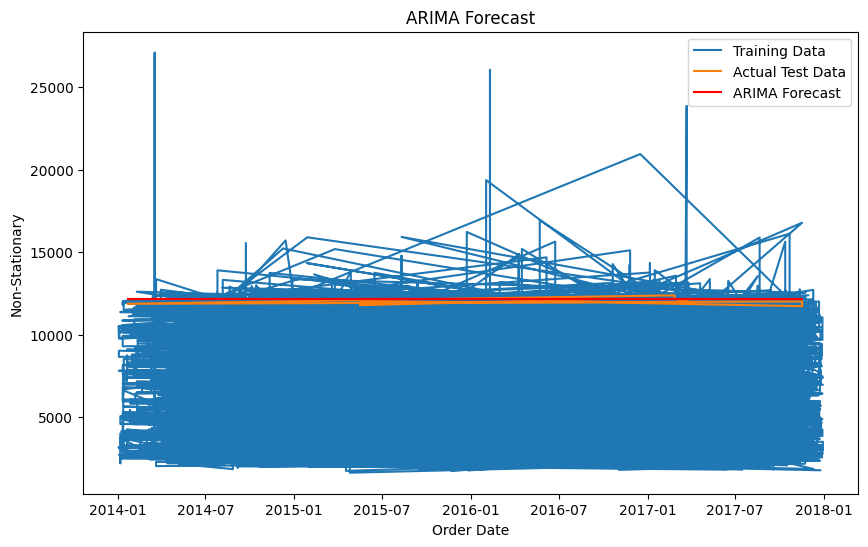

Mean Squared Error (ARIMA): 48567.3425675479


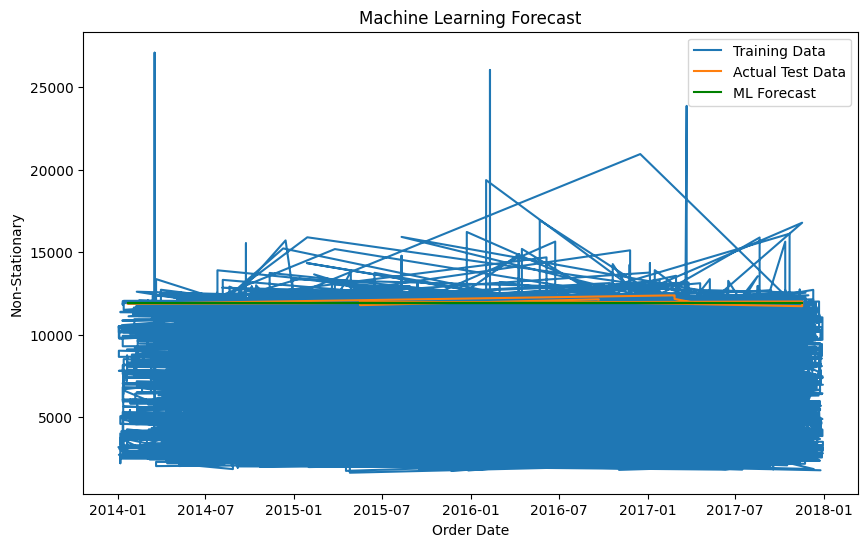

Mean Squared Error (ML): 46106.49042213915


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Assuming your original dataset is in a DataFrame called superstore_data


# Extract the time series component you want to model (e.g., 'Non-Stationary' with noise)
time_series = superstore_data['Non-Stationary']

# Ensure that the time series is a pandas Series
time_series = pd.Series(time_series)

# Split the time series data into training and testing sets
# Here, let's use the last 12 months as the testing set
train_size = len(time_series) - 12
train, test = time_series[:train_size], time_series[train_size:]

# ARIMA modeling
# Fit ARIMA model
order = (1, 1, 1)  # Example order, you may need to tune these parameters
model_arima = ARIMA(train, order=order)
results_arima = model_arima.fit()

# Forecast future values
forecast_arima = results_arima.forecast(steps=len(test))

# Plot ARIMA forecast
plt.figure(figsize=(10, 6))
plt.plot(train, label='Training Data')
plt.plot(test, label='Actual Test Data')
plt.plot(test.index, forecast_arima, label='ARIMA Forecast', color='red')
plt.title('ARIMA Forecast')
plt.xlabel('Order Date')
plt.ylabel('Non-Stationary')
plt.legend()
plt.show()

# Evaluate ARIMA model
mse_arima = mean_squared_error(test, forecast_arima)
print(f'Mean Squared Error (ARIMA): {mse_arima}')

# Machine Learning Model (Random Forest Regressor)
# Prepare features and target variables
X_train, y_train = np.arange(len(train)).reshape(-1, 1), train.values
X_test, y_test = np.arange(len(train), len(train) + len(test)).reshape(-1, 1), test.values

# Initialize and fit the model
model_ml = RandomForestRegressor(n_estimators=100, random_state=42)
model_ml.fit(X_train, y_train)

# Predict future values
forecast_ml = model_ml.predict(X_test)

# Plot ML forecast
plt.figure(figsize=(10, 6))
plt.plot(train, label='Training Data')
plt.plot(test, label='Actual Test Data')
plt.plot(test.index, forecast_ml, label='ML Forecast', color='green')
plt.title('Machine Learning Forecast')
plt.xlabel('Order Date')
plt.ylabel('Non-Stationary')
plt.legend()
plt.show()

# Evaluate Machine Learning model
mse_ml = mean_squared_error(test, forecast_ml)
print(f'Mean Squared Error (ML): {mse_ml}')


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

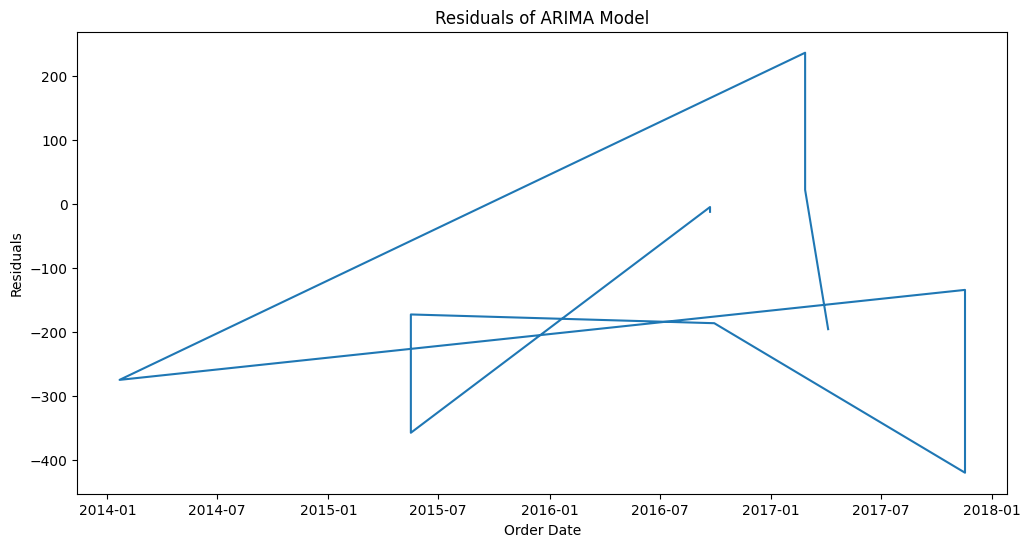

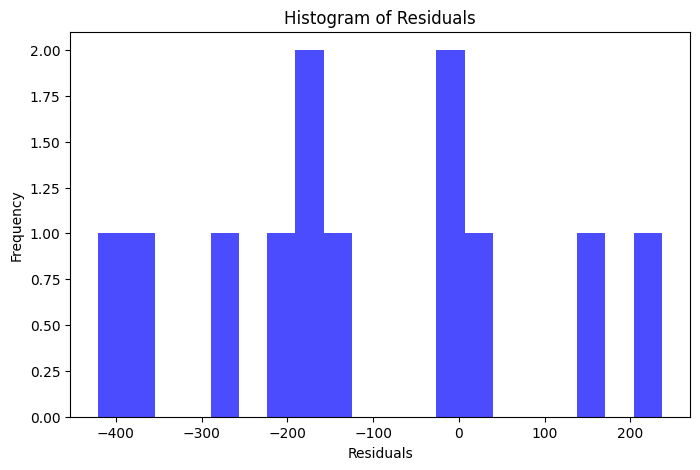

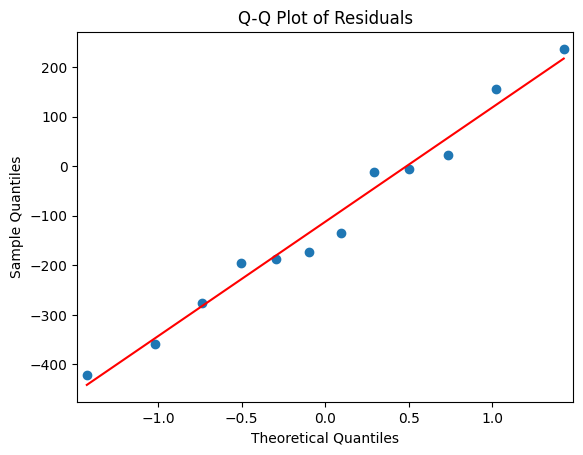

<Figure size 1200x600 with 0 Axes>

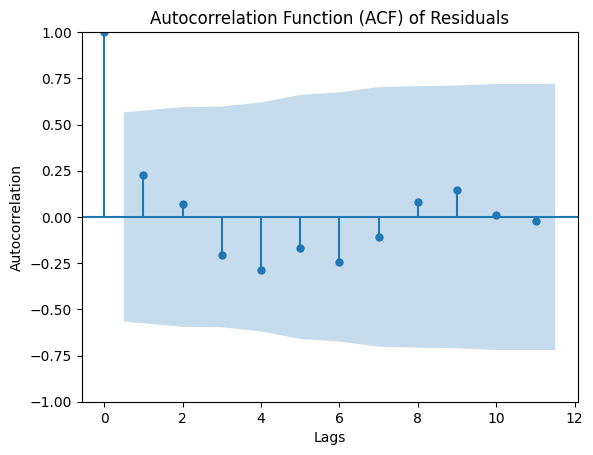

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Assuming your original dataset is in a DataFrame called superstore_data



# Extract the time series component you want to model (e.g., 'Non-Stationary' with noise)
time_series = superstore_data['Non-Stationary']

# Ensure that the time series is a pandas Series
time_series = pd.Series(time_series)

# Split the time series data into training and testing sets
# Here, let's use the last 12 months as the testing set
train_size = len(time_series) - 12
train, test = time_series[:train_size], time_series[train_size:]

# ARIMA modeling
# Fit ARIMA model
order = (1, 1, 1)  # Example order, you may need to tune these parameters
model_arima = ARIMA(train, order=order)
results_arima = model_arima.fit()

# Forecast future values
forecast_arima = results_arima.forecast(steps=len(test))

# Ensure that the forecast has the same index as the test set
forecast_arima.index = test.index

# Residual Analysis
residuals = test - forecast_arima

# Plot Residuals
plt.figure(figsize=(12, 6))
plt.plot(residuals.index, residuals.values)  # Use index for x-axis
plt.title('Residuals of ARIMA Model')
plt.xlabel('Order Date')
plt.ylabel('Residuals')
plt.show()

# Histogram of Residuals
plt.figure(figsize=(8, 5))
plt.hist(residuals, bins=20, color='blue', alpha=0.7)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Q-Q plot (Quantile-Quantile plot) to check normality of residuals
from statsmodels.graphics.gofplots import qqplot
qqplot(residuals, line='r')
plt.title('Q-Q Plot of Residuals')
plt.show()

# Assuming 'residuals' is your pandas Series of residuals
residuals = residuals.dropna()  # Drop any NaN values to avoid issues

# Plot ACF
plt.figure(figsize=(12, 6))
plot_acf(residuals, lags=min(20, len(residuals)-1))  # Limit lags to the length of 'residuals' minus 1
plt.title('Autocorrelation Function (ACF) of Residuals')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.show()

In [22]:
# Evaluate ARIMA model
mse_arima = mean_squared_error(test, forecast_arima)
print(f'Mean Squared Error (ARIMA): {mse_arima}')

# Evaluate Machine Learning model (Random Forest Regressor)
mse_ml = mean_squared_error(test, forecast_ml)
print(f'Mean Squared Error (ML): {mse_ml}')


Mean Squared Error (ARIMA): 48567.3425675479
Mean Squared Error (ML): 46106.49042213915


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

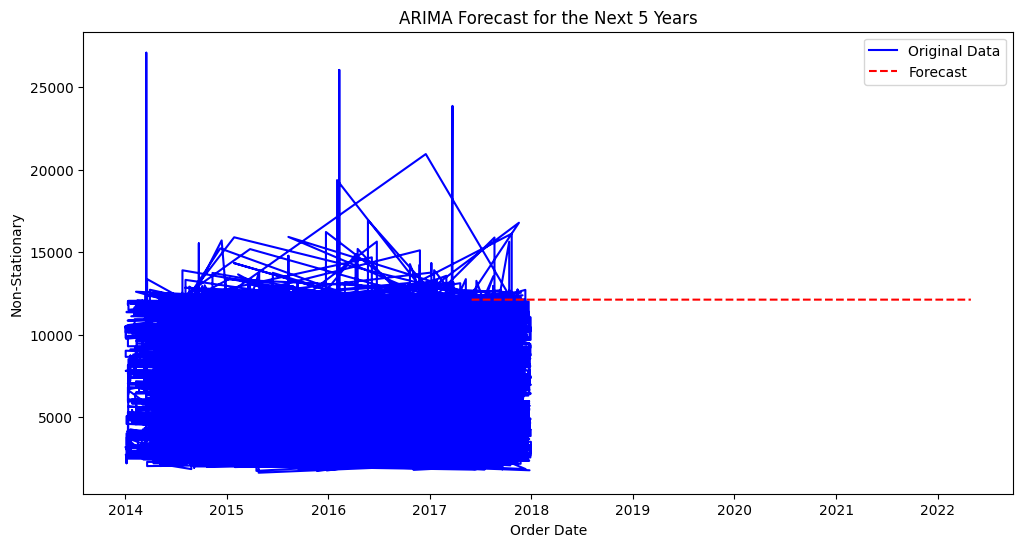

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Assuming your original dataset is in a DataFrame called superstore_data
# Extract the time series component you want to model (e.g., 'Non-Stationary' with noise)
time_series = superstore_data['Non-Stationary']

# Ensure that the time series is a pandas Series
time_series = pd.Series(time_series)

# Fit ARIMA model to the entire dataset
order = (1, 1, 1)  # Example order, you may need to tune these parameters
model_arima = ARIMA(time_series, order=order)
results_arima = model_arima.fit()

# Forecast future values for the next 5 years (assuming monthly data)
forecast_future = results_arima.forecast(steps=60)  # 12 months/year * 5 years = 60 months

# Create a new index for the forecasted values
index_future = pd.date_range(time_series.index[-1] + pd.DateOffset(months=1), periods=60, freq='M')

# Combine the existing time series with the forecasted values
time_series_extended = pd.concat([time_series, pd.Series(forecast_future, index=index_future)])

# Plot the original time series and the forecasted values
plt.figure(figsize=(12, 6))
plt.plot(time_series_extended.index, time_series_extended.values, label='Original Data', color='blue')
plt.plot(index_future, forecast_future, label='Forecast', color='red', linestyle='dashed')
plt.title('ARIMA Forecast for the Next 5 Years')
plt.xlabel('Order Date')
plt.ylabel('Non-Stationary')
plt.legend()
plt.show()


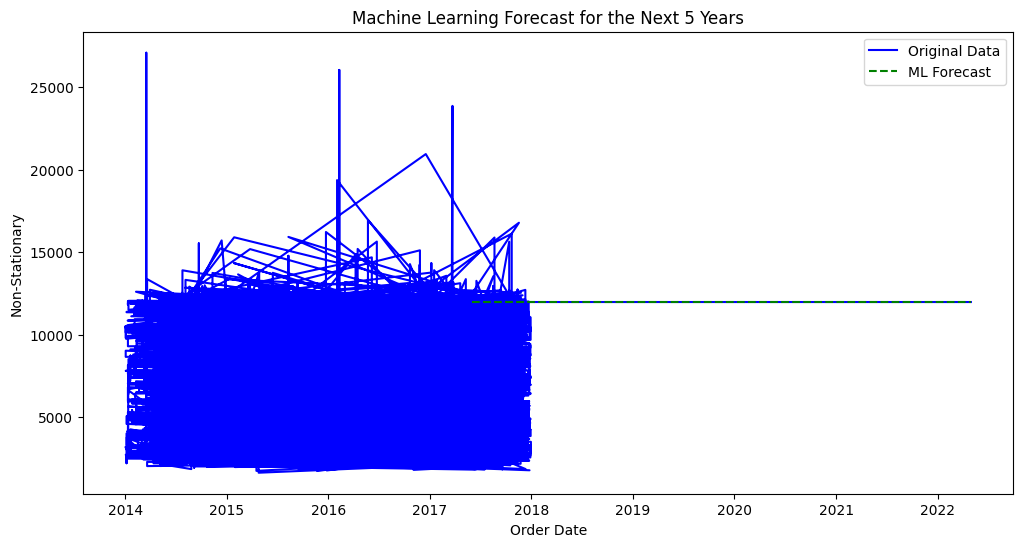

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Assuming your original dataset is in a DataFrame called superstore_data

# Extract the time series component you want to model (e.g., 'Non-Stationary' with noise)
time_series = superstore_data['Non-Stationary']

# Ensure that the time series is a pandas Series
time_series = pd.Series(time_series)

# Split the time series data into training and testing sets
# Here, let's use the last 12 months as the training set and the next 60 months as the testing set (for the next 5 years)
train_size = len(time_series) - 72  # 12 months for training + 60 months for testing
train, test = time_series[:train_size], time_series[train_size:]

# Initialize and fit the machine learning model (Random Forest Regressor)
X_train, y_train = np.arange(len(train)).reshape(-1, 1), train.values
X_test = np.arange(len(train), len(train) + 60).reshape(-1, 1)  # 60 months for the next 5 years
model_ml = RandomForestRegressor(n_estimators=100, random_state=42)
model_ml.fit(X_train, y_train)

# Predict future values
forecast_ml = model_ml.predict(X_test)

# Create a new index for the forecasted values
index_future = pd.date_range(time_series.index[-1] + pd.DateOffset(months=1), periods=60, freq='M')

# Combine the existing time series with the forecasted values
time_series_extended_ml = pd.concat([time_series, pd.Series(forecast_ml, index=index_future)])

# Plot the original time series and the forecasted values
plt.figure(figsize=(12, 6))
plt.plot(time_series_extended_ml.index, time_series_extended_ml.values, label='Original Data', color='blue')
plt.plot(index_future, forecast_ml, label='ML Forecast', color='green', linestyle='dashed')
plt.title('Machine Learning Forecast for the Next 5 Years')
plt.xlabel('Order Date')
plt.ylabel('Non-Stationary')
plt.legend()
plt.show()


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt

In [28]:
superstore_data.head(4)

,Row ID,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,Product Name,Sales,Quantity,Discount,Profit,Year,Trend,Seasonality,Noise,Non-Stationary
Order Date,,,,,,,,,,,,,,,,,,,,,
2016-08-11,1,CA-2016-152156,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016,2016,-0.951057,99.342831,2376.351774
2016-08-11,2,CA-2016-152156,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016,2017,-0.951057,-27.652860,2720.336083
2016-12-06,3,CA-2016-138688,16-06-2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,...,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016,2018,0.951057,129.537708,2163.108764
2015-11-10,4,US-2015-108966,18-10-2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015,2018,0.587785,304.605971,3280.771257


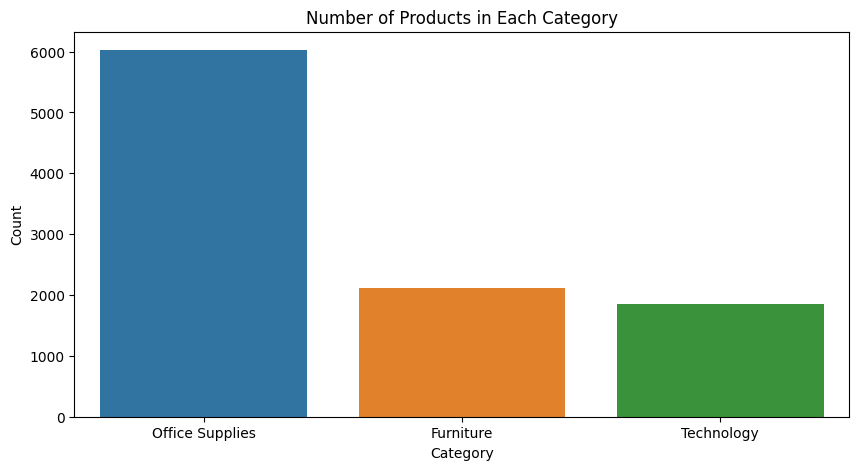

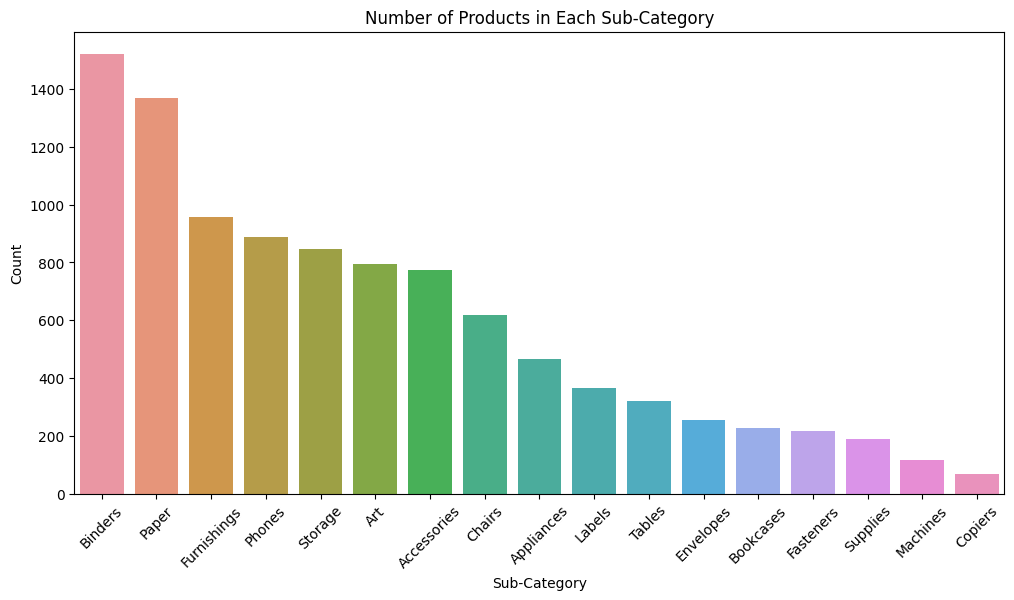

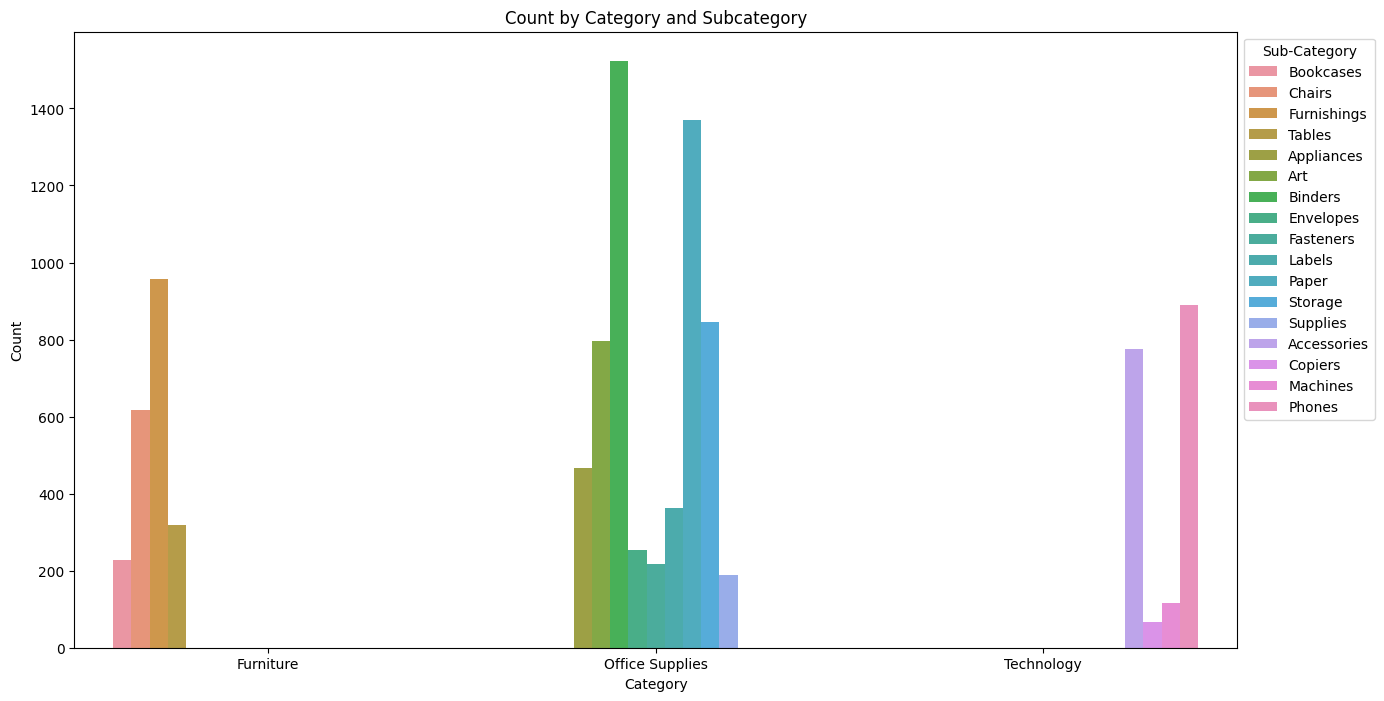

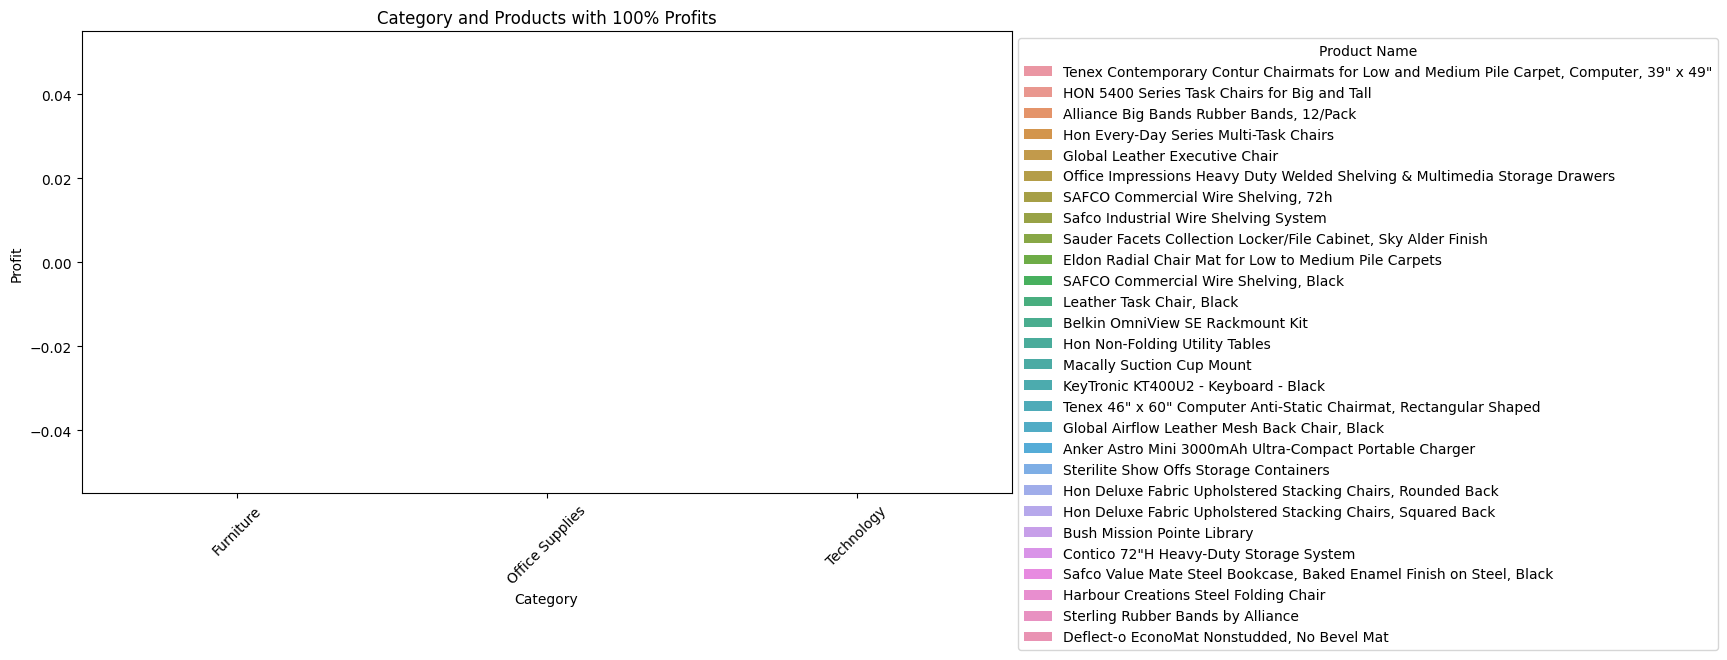

In [29]:
#Product Level Analysis
# * Number of products in each category
# * Number of products in each sub-category
# * Count by Category and Subcategory
# * Category and Products with 100% profits



# import pandas as pd
# import matplotlib.pyplot as plt
import seaborn as sns



# Number of products in each category
category_counts = superstore_data['Category'].value_counts()

# Number of products in each sub-category
subcategory_counts = superstore_data['Sub-Category'].value_counts()

# Count by Category and Subcategory
category_subcategory_counts = superstore_data.groupby(['Category', 'Sub-Category']).size().reset_index(name='Count')

# Category and Products with 100% profits
profitable_products = superstore_data[superstore_data['Profit'] == 0]

# Visualization

# Number of products in each category
plt.figure(figsize=(10, 5))
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.title('Number of Products in Each Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

# Number of products in each sub-category
plt.figure(figsize=(12, 6))
sns.barplot(x=subcategory_counts.index, y=subcategory_counts.values)
plt.title('Number of Products in Each Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Count by Category and Subcategory
plt.figure(figsize=(15, 8))
sns.barplot(x='Category', y='Count', hue='Sub-Category', data=category_subcategory_counts)
plt.title('Count by Category and Subcategory')
plt.xlabel('Category')
plt.ylabel('Count')
plt.legend(title='Sub-Category', bbox_to_anchor=(1, 1))
plt.show()

# Category and Products with 100% profits
plt.figure(figsize=(12, 6))
sns.barplot(x='Category', y='Profit', hue='Product Name', data=profitable_products)
plt.title('Category and Products with 100% Profits')
plt.xlabel('Category')
plt.ylabel('Profit')
plt.xticks(rotation=45)
plt.legend(title='Product Name', bbox_to_anchor=(1, 1))
plt.show()




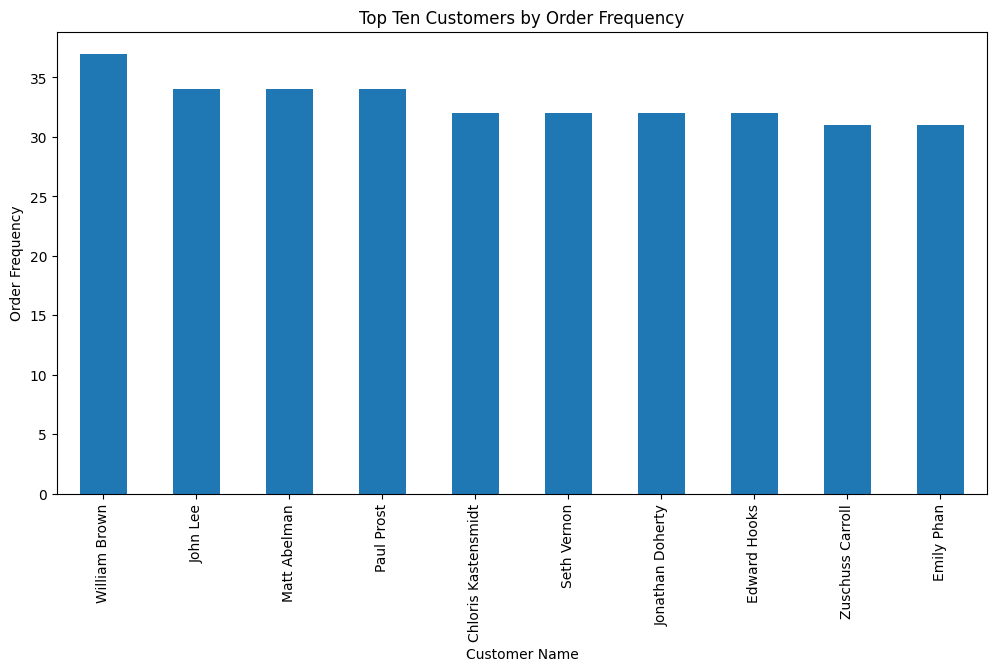

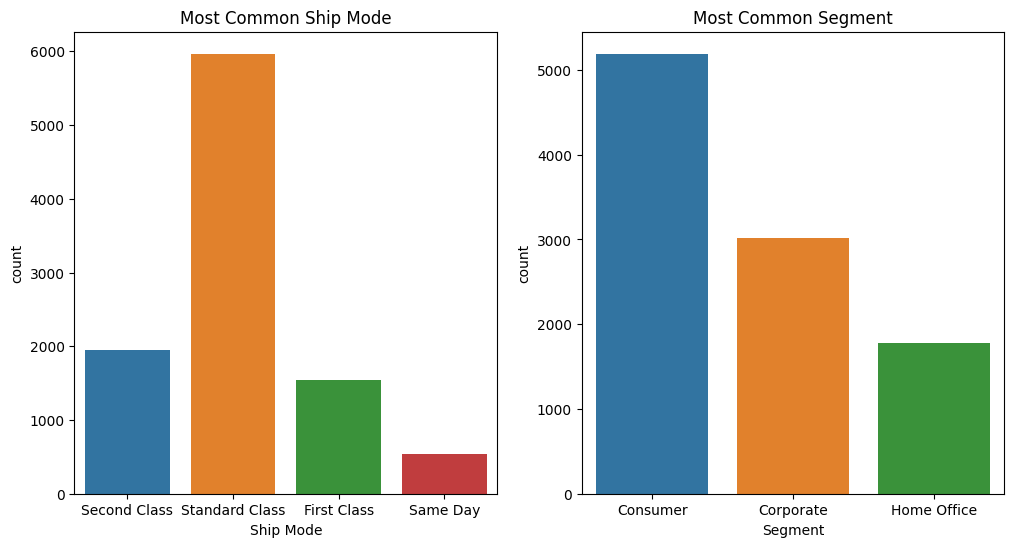

<Figure size 1200x600 with 0 Axes>

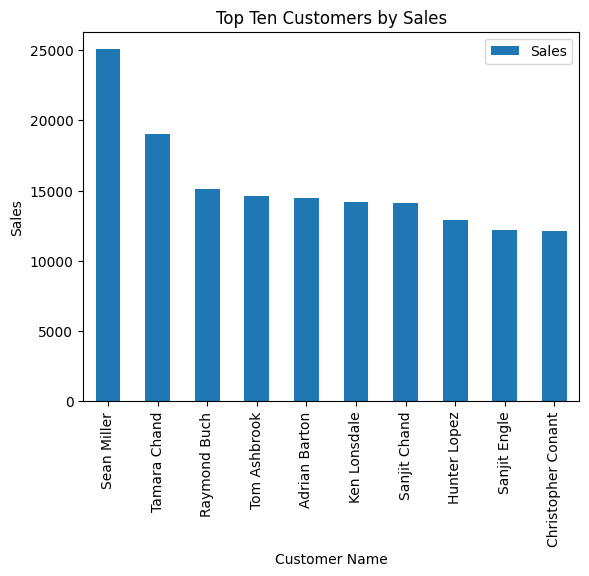

In [35]:


# Assuming your DataFrame is named 'superstore_data'
# Replace 'your_column_names' with the actual column names in your dataset

# Top Ten Customers who ordered frequently from the store
top_ten_customers_frequency = superstore_data['Customer Name'].value_counts().head(10)

# The most common ship_mode and segment used by customers
common_ship_mode = superstore_data['Ship Mode'].mode()[0]
common_segment = superstore_data['Segment'].mode()[0]

# Top 20 Customers by profit and by State
top_20_customers_profit_state = superstore_data.groupby(['Customer Name', 'State']).agg({'Profit': 'sum'}).nlargest(20, 'Profit')

# Top 10 Customers by Sale and by State
top_10_customers_sale_state = superstore_data.groupby(['Customer Name', 'State']).agg({'Sales': 'sum'}).nlargest(10, 'Sales')

# Top Ten Customers by Sales
top_ten_customers_sales = superstore_data.groupby('Customer Name').agg({'Sales': 'sum'}).nlargest(10, 'Sales')

# Visualization

# Top Ten Customers who ordered frequently from the store
plt.figure(figsize=(12, 6))
top_ten_customers_frequency.plot(kind='bar')
plt.title('Top Ten Customers by Order Frequency')
plt.xlabel('Customer Name')
plt.ylabel('Order Frequency')
plt.show()

# The most common ship_mode and segment used by customers
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.countplot(x='Ship Mode', data=superstore_data, ax=axes[0])
axes[0].set_title('Most Common Ship Mode')

sns.countplot(x='Segment', data=superstore_data, ax=axes[1])
axes[1].set_title('Most Common Segment')

plt.show()




# Top Ten Customers by Sales
plt.figure(figsize=(12, 6))
top_ten_customers_sales.plot(kind='bar')
plt.title('Top Ten Customers by Sales')
plt.xlabel('Customer Name')
plt.ylabel('Sales')
plt.show()


In [36]:
# Step 2: Data Exploration
print("Basic Statistics:")
print(superstore_data.describe())

Basic Statistics:
            Row ID   Postal Code         Sales     Quantity     Discount  \
count  9994.000000   9994.000000   9994.000000  9994.000000  9994.000000   
mean   4997.500000  55190.379428    229.858001     3.789574     0.156203   
std    2885.163629  32063.693350    623.245101     2.225110     0.206452   
min       1.000000   1040.000000      0.444000     1.000000     0.000000   
25%    2499.250000  23223.000000     17.280000     2.000000     0.000000   
50%    4997.500000  56430.500000     54.490000     3.000000     0.200000   
75%    7495.750000  90008.000000    209.940000     5.000000     0.200000   
max    9994.000000  99301.000000  22638.480000    14.000000     0.800000   

            Profit         Year         Trend   Seasonality        Noise  \
count  9994.000000  9994.000000   9994.000000  9.994000e+03  9994.000000   
mean     28.656896  2015.722233   7012.222233  1.242006e-01    -0.446101   
std     234.260108     1.123555   2885.181184  7.055614e-01   200.670

<ipython-input-40-64b309a483a2>:9: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  superstore_data['Order Date'] = pd.to_datetime(superstore_data['Order Date'])


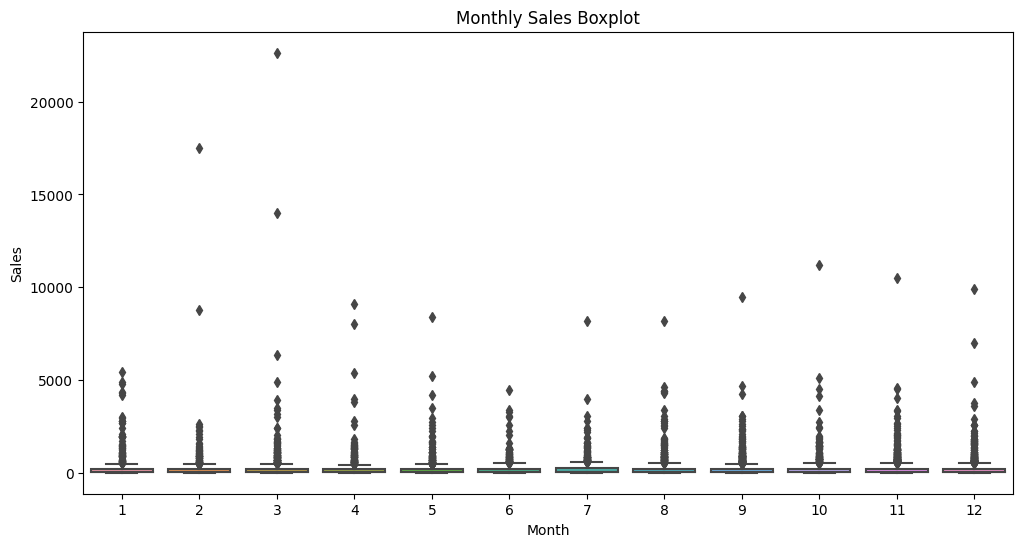

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Superstore dataset
superstore_data = pd.read_csv('Sample - Superstore.csv', encoding='ISO-8859-1')

# Assuming 'Order Date' is in string format, convert it to datetime
superstore_data['Order Date'] = pd.to_datetime(superstore_data['Order Date'])

# Extracting month and year from the 'Order Date' column
superstore_data['month'] = superstore_data['Order Date'].dt.month
superstore_data['year'] = superstore_data['Order Date'].dt.year

# Creating a boxplot of Sales for each month
plt.figure(figsize=(12, 6))
sns.boxplot(x='month', y='Sales', data=superstore_data)
plt.title('Monthly Sales Boxplot')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()


In [41]:
# Step 5: Model Selection
# a. Simple Models
# Moving Averages
superstore_data['rolling_mean'] = superstore_data['Sales'].rolling(window=3).mean()  # Adjust window size as needed

# Explanation:
# sales_data['item_cnt_day']: This is the time series data you are working with, specifically the daily count of items (item_cnt_day).

# rolling(window=3): This part creates a rolling window of size 3. The rolling window is a moving subset of your data that "rolls" through the entire series. In this case, it considers the current value and the two previous values.

# mean(): For each position of the rolling window, it calculates the mean (average) of the values within that window.

# sales_data['rolling_mean']: This creates a new column in your DataFrame (sales_data) called 'rolling_mean' to store the calculated moving averages.

# Purpose:
# The moving average is a simple method to smooth out short-term fluctuations in time series data. It is particularly useful for highlighting trends over time. By calculating the average over a window of adjacent data points, the noise or randomness in the data can be reduced, making it easier to identify underlying patterns.

# Adjustments:
# Window Size (window=3): You can adjust the window size based on your requirements. A larger window will result in a smoother curve but may smooth out important short-term fluctuations. Experiment with different window sizes to find a balance that suits your analysis.

# Other Aggregations: Instead of the mean, you can use other aggregation functions like sum, median, or other statistical measures, depending on the nature of your data and the insights you are seeking.


<ipython-input-42-a9a45789e063>:8: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  superstore_data['Order Date'] = pd.to_datetime(superstore_data['Order Date'])


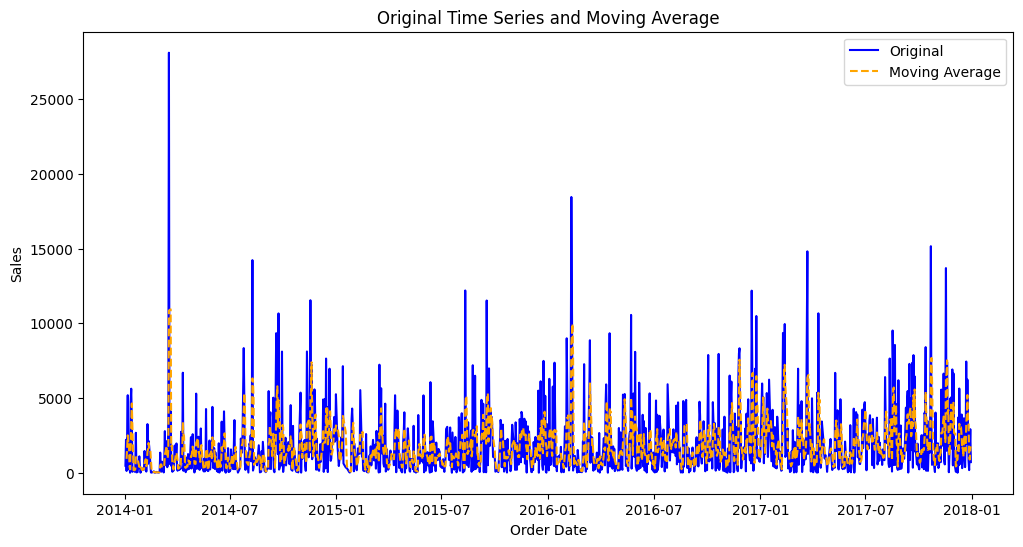

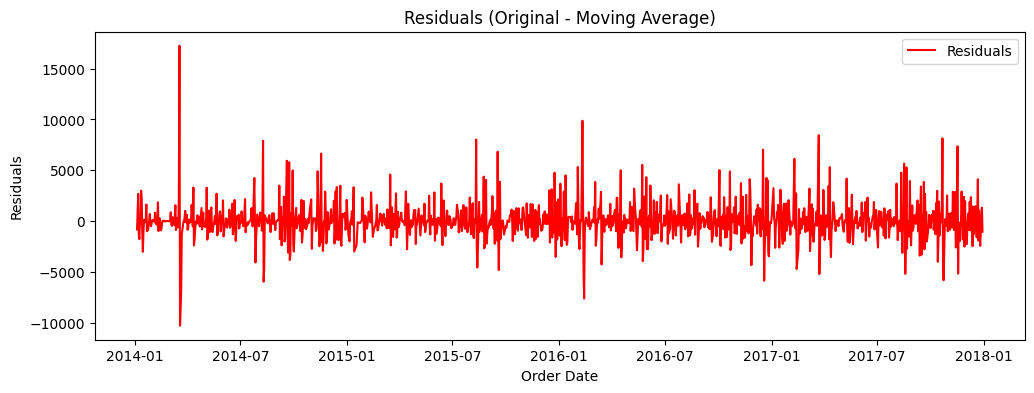

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Superstore dataset
superstore_data = pd.read_csv('Sample - Superstore.csv', encoding='ISO-8859-1')

# Assuming 'Order Date' is in string format, convert it to datetime
superstore_data['Order Date'] = pd.to_datetime(superstore_data['Order Date'])

# Extract relevant columns for time series analysis
time_series_data = superstore_data.groupby('Order Date')['Sales'].sum().reset_index()

# Calculate the moving average
time_series_data['rolling_mean'] = time_series_data['Sales'].rolling(window=3).mean()  # Adjust window size as needed

# Plot Original Time Series and Moving Average
plt.figure(figsize=(12, 6))
plt.plot(time_series_data['Order Date'], time_series_data['Sales'], label='Original', color='blue')
plt.plot(time_series_data['Order Date'], time_series_data['rolling_mean'], label='Moving Average', linestyle='--', color='orange')
plt.title('Original Time Series and Moving Average')
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

# Plot Residuals (Difference between Original and Moving Average)
residuals = time_series_data['Sales'] - time_series_data['rolling_mean']

plt.figure(figsize=(12, 4))
plt.plot(time_series_data['Order Date'], residuals, label='Residuals', color='red')
plt.title('Residuals (Original - Moving Average)')
plt.xlabel('Order Date')
plt.ylabel('Residuals')
plt.legend()
plt.show()


<ipython-input-43-a9bcf74f80a8>:8: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  superstore_data['Order Date'] = pd.to_datetime(superstore_data['Order Date'])


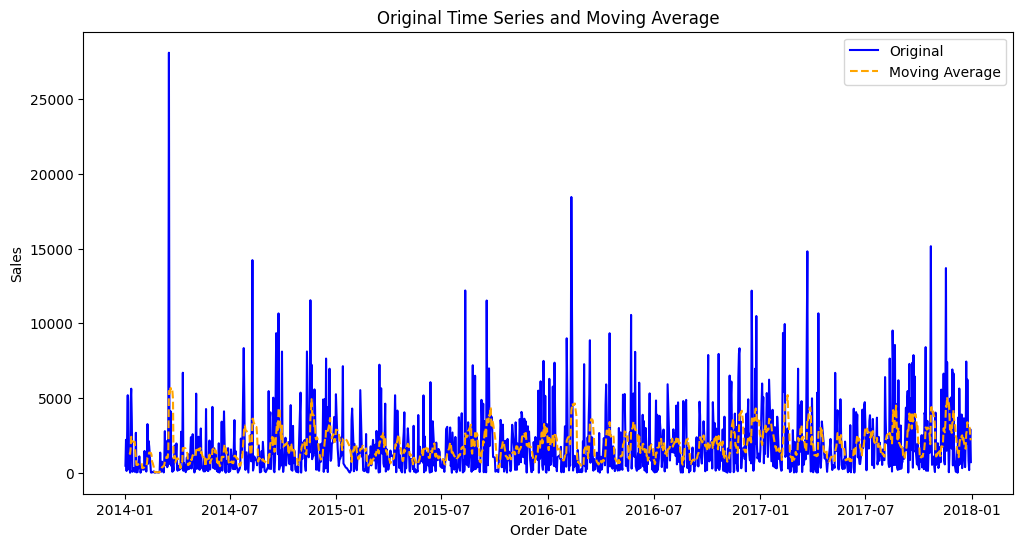

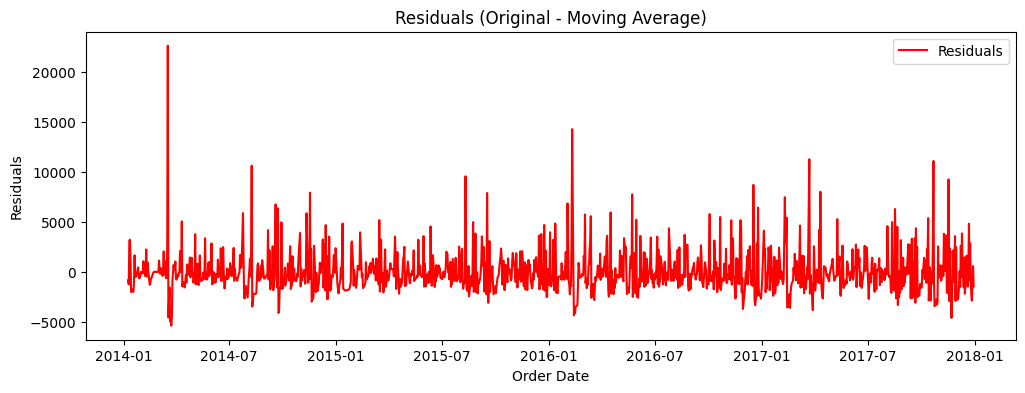

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Superstore dataset
superstore_data = pd.read_csv('Sample - Superstore.csv', encoding='ISO-8859-1')

# Assuming 'Order Date' is in string format, convert it to datetime
superstore_data['Order Date'] = pd.to_datetime(superstore_data['Order Date'])

# Extract relevant columns for time series analysis
time_series_data = superstore_data.groupby('Order Date')['Sales'].sum().reset_index()

# Calculate the moving average with a window size of 7
time_series_data['rolling_mean'] = time_series_data['Sales'].rolling(window=7).mean()

# Plot Original Time Series and Moving Average
plt.figure(figsize=(12, 6))
plt.plot(time_series_data['Order Date'], time_series_data['Sales'], label='Original', color='blue')
plt.plot(time_series_data['Order Date'], time_series_data['rolling_mean'], label='Moving Average', linestyle='--', color='orange')
plt.title('Original Time Series and Moving Average')
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

# Plot Residuals (Difference between Original and Moving Average)
residuals = time_series_data['Sales'] - time_series_data['rolling_mean']

plt.figure(figsize=(12, 4))
plt.plot(time_series_data['Order Date'], residuals, label='Residuals', color='red')
plt.title('Residuals (Original - Moving Average)')
plt.xlabel('Order Date')
plt.ylabel('Residuals')
plt.legend()
plt.show()


In [44]:


# Calculate rolling means
time_series_data['rolling_mean_3'] = time_series_data['Sales'].rolling(window=3).mean()
time_series_data['rolling_mean_7'] = time_series_data['Sales'].rolling(window=7).mean()

# Calculate residuals for 3-window and 7-window moving averages
residuals_3 = time_series_data['Sales'] - time_series_data['rolling_mean_3']
residuals_7 = time_series_data['Sales'] - time_series_data['rolling_mean_7']

# Print the sum of residuals for both cases
print(f"Sum of Residuals (3-window): {residuals_3.sum()}")
print(f"Sum of Residuals (7-window): {residuals_7.sum()}")




Sum of Residuals (3-window): -177.36266666347774
Sum of Residuals (7-window): -1.8853999998332256
